<a href="https://colab.research.google.com/github/kalleo1996/pysparkMLExample/blob/main/date_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession \
    .builder \
    .config("spark.driver.memory", "15g") \
    .appName("Exploratory Analysis") \
    .getOrCreate()

In [4]:
import numpy as np

import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
parking2017 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
parking2016 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv')
parking2015 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2015.csv')
parking2014 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv')

In [7]:
parking2017 = parking2017.dropDuplicates()
parking2016 = parking2016.dropDuplicates()
parking2015 = parking2015.dropDuplicates()
parking2014 = parking2014.dropDuplicates()

In [10]:
parking2017 = parking2017.toDF(*(c.replace(' ', '_') for c in parking2017.columns))
parking2016 = parking2016.toDF(*(c.replace(' ', '_') for c in parking2016.columns))
parking2015 = parking2015.toDF(*(c.replace(' ', '_') for c in parking2015.columns))
parking2014 = parking2014.toDF(*(c.replace(' ', '_') for c in parking2014.columns))

# Predictions

In [12]:
from pyspark.sql.functions import unix_timestamp, from_unixtime

parking2017.createOrReplaceTempView("parkingtable2017")
parking2016.createOrReplaceTempView("parkingtable2016")
parking2015.createOrReplaceTempView("parkingtable2015")
parking2014.createOrReplaceTempView("parkingtable2014")

In [13]:
from pyspark.sql.functions import udf,desc
from datetime import datetime

In [14]:


from pyspark.sql.functions import date_format
from pyspark.sql.functions import to_date, date_format

from pyspark.sql.functions import *


In [15]:
data_2017 = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , count(*) as frequency from parkingtable2017  Group by year,month,day,Violation_Location, Violation_Code order by year,month,day,Violation_Location,Violation_Code ")

In [16]:
data_2017_day = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) day,Violation_Location,count(*) as totalViolation from parkingtable2017  Group by year,month,day,Violation_Location order by year,month,day,Violation_Location ")

In [17]:
data_2017_day.dtypes

[('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('Violation_Location', 'int'),
 ('totalViolation', 'bigint')]

In [ ]:
#data_2017_day.show(100)

In [18]:
import pyspark.sql.functions as F
from pyspark.sql.functions import round, col
df = data_2017.join(data_2017_day, (data_2017.Violation_Location == data_2017_day.Violation_Location) & (data_2017.year == data_2017_day.year)& (data_2017.month == data_2017_day.month)& (data_2017.day == data_2017_day.day))\
    .withColumn("violation_probability", round(F.col("frequency") / F.col("totalViolation"), 5))\
    .drop(data_2017_day.totalViolation).drop(data_2017.frequency).drop(data_2017_day.Violation_Location).drop(data_2017_day.month).drop(data_2017_day.day).drop(data_2017_day.year)
#df.show(100)

for 2014 to 2016 first

In [19]:
data_2014 = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , count(*) as frequency from parkingtable2014  Group by year,month,day,Violation_Location, Violation_Code order by year,month,day,Violation_Location,Violation_Code ")
data_2014.createOrReplaceTempView("data_2014")
data_2014 = spark.sql("select year,month,day,Violation_Location,Violation_Code,frequency from data_2014 where year >= 2014 ")

data_2015 = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , count(*) as frequency from parkingtable2015  Group by year,month,day,Violation_Location, Violation_Code order by year,month,day,Violation_Location,Violation_Code ")


data_2016 = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , count(*) as frequency from parkingtable2016  Group by year,month,day,Violation_Location, Violation_Code order by year,month,day,Violation_Location,Violation_Code ")



In [20]:
data_2014.dtypes

[('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('Violation_Location', 'int'),
 ('Violation_Code', 'int'),
 ('frequency', 'bigint')]

In [21]:
data_2014_day = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location,count(*) as totalViolation from parkingtable2014  Group by year,month,day,Violation_Location order by year,month,day,Violation_Location ")
data_2014_day.createOrReplaceTempView("data_2014_day")
data_2014_day= spark.sql("select year,month,day,Violation_Location,totalViolation from data_2014_day where year >= 2014 ")
data_2015_day = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location,count(*) as totalViolation from parkingtable2015  Group by year,month,day,Violation_Location order by year,month,day,Violation_Location ")

data_2016_day = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location,count(*) as totalViolation from parkingtable2016 where  Group by year,month,day,Violation_Location order by year,month,day,Violation_Location ")


In [22]:
data_2014_day.dtypes

[('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('Violation_Location', 'int'),
 ('totalViolation', 'bigint')]

In [23]:
import pyspark.sql.functions as F
from pyspark.sql.functions import round, col
df_2014 = data_2014.join(data_2014_day, (data_2014.Violation_Location == data_2014_day.Violation_Location) & (data_2014.year == data_2014_day.year)& (data_2014.month == data_2014_day.month) & (data_2014_day.day == data_2014_day.day))\
    .withColumn("violation_probability", round(F.col("frequency") / F.col("totalViolation"), 5))\
    .drop(data_2014_day.totalViolation).drop(data_2014.frequency).drop(data_2014_day.Violation_Location).drop(data_2014_day.month).drop(data_2014_day.day).drop(data_2014_day.year)

df_2015 = data_2015.join(data_2015_day, (data_2015.Violation_Location == data_2015_day.Violation_Location) & (data_2015.year == data_2015_day.year)& (data_2015.month == data_2015_day.month) & (data_2015_day.day == data_2015_day.day))\
    .withColumn("violation_probability", round(F.col("frequency") / F.col("totalViolation"), 5))\
    .drop(data_2015_day.totalViolation).drop(data_2015.frequency).drop(data_2015_day.Violation_Location).drop(data_2015_day.month).drop(data_2015_day.day).drop(data_2015_day.year)

df_2016 = data_2016.join(data_2016_day, (data_2016.Violation_Location == data_2016_day.Violation_Location) & (data_2016.year == data_2016_day.year)& (data_2016.month == data_2016_day.month) & (data_2016_day.day == data_2016_day.day))\
    .withColumn("violation_probability", round(F.col("frequency") / F.col("totalViolation"), 5))\
    .drop(data_2016_day.totalViolation).drop(data_2016.frequency).drop(data_2016_day.Violation_Location).drop(data_2016_day.month).drop(data_2016_day.day).drop(data_2016_day.year)

#df_2015.show()

In [24]:
#dataframe concatenation
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

#def unionAll(*dfs):
    #return reduce(DataFrame.unionAll, dfs)

#full_df = unionAll(df_2014,df_2015, df_2016,df)
#train_df.show(10)

In [25]:
full_df = df.union(df_2014).union(df_2015).union(df_2016)

In [26]:
full_df=full_df.dropna()

In [27]:
df.select(countDistinct("Violation_Location"))

DataFrame[count(DISTINCT Violation_Location): bigint]

In [28]:
full_df.groupBy('Violation_Location').count().show()

+------------------+-----+
|Violation_Location|count|
+------------------+-----+
|                78|17991|
|               108|30758|
|                34|23784|
|               115|30129|
|               101|10483|
|                81|10236|
|                28|22889|
|                76|12714|
|                26|19638|
|                44|24222|
|               103|28089|
|                22|  633|
|               122|12014|
|               111|14680|
|                47|23938|
|                 1|36609|
|                52|27122|
|                13|36338|
|                 6|28734|
|                20|29210|
+------------------+-----+
only showing top 20 rows



In [29]:
full_df.groupBy('Violation_Code').count().show()

+--------------+-----+
|Violation_Code|count|
+--------------+-----+
|            31|15244|
|            85| 8374|
|            65|   18|
|            53|36613|
|            78|32602|
|            34|    9|
|            81|  293|
|            28|   20|
|            27| 3261|
|            26| 1413|
|            44|   28|
|            12|   37|
|            91| 1513|
|            22|  211|
|            93|    6|
|            47| 7076|
|             1|  892|
|            52| 2074|
|            13|20015|
|            16|56409|
+--------------+-----+
only showing top 20 rows



In [30]:
from pyspark.sql.functions import countDistinct
df2=full_df.select(countDistinct("Violation_Location"))
df2.show()

+----------------------------------+
|count(DISTINCT Violation_Location)|
+----------------------------------+
|                                77|
+----------------------------------+



In [ ]:
#from pyspark.ml.feature import StringIndexer
#qualification_indexer = StringIndexer(inputCol="day", outputCol="day_chng")
#Fits a model to the input dataset with optional parameters.
#df_buck = qualification_indexer.fit(full_df).transform(full_df)
#df_buck.show()

In [31]:
from pyspark.ml.feature import OneHotEncoder

#for training data
#

day_encoded = OneHotEncoder(inputCol="day", outputCol="day_one")
df_buck = day_encoded.fit(full_df).transform(full_df)







#df_buck_train.show(10)

In [32]:
location_encoded = OneHotEncoder(inputCol="Violation_Location", outputCol="Violation_Location_one")
df_buck1 = location_encoded.fit(df_buck).transform(df_buck)

In [33]:
code_encoded = OneHotEncoder(inputCol="Violation_Code", outputCol="Violation_Code_one")
df_buck2 = code_encoded.fit(df_buck1).transform(df_buck1)


In [34]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

#for training data
#assembler = VectorAssembler(inputCols=["day_one","month_one","Violation_Location_one","week_one","Violation_Code_one"], outputCol="features")
# Assemble all the features with VectorAssembler
required_features = ["year","month","day_one","Violation_Location_one","Violation_Code_one"]

from pyspark.ml.feature import VectorAssembler

numericCols = [] #['prob']
assemblerInputs = [c  for c in required_features] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')

transformed_data = assembler.transform(df_buck2)
#transformed_data.show(5)

In [35]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2], seed =2020)

In [36]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='violation_probability')
lr_model = lr.fit(training_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.00045291833423771527,-0.00018543392731361404,0.0,0.000486941350686518,-0.0006507778812370849,-0.0006527085785566389,0.0015708622011951284,0.0014040605763749436,-0.0005340943711781278,-0.0008584136198417858,-0.0013297405411161283,-0.0010815128455496507,-0.0017307529765146655,-0.001347389457124341,-0.0004154419675699966,-0.0007601860237798542,-0.0012799546808392715,-0.0008066090416398894,-0.0021354469447801365,-0.0015462894230494264,-0.0009730918732647103,-0.0018203007860969145,-0.0021000675868057743,-0.002217667052729164,-0.0017549337715594456,-0.0018000133196845907,-0.0020884213234915587,0.0005839586551232288,0.0017358114208601832,-0.00011023911495919588,-0.0011202519375563258,-0.0005990911143358011,-0.0016345583615795273,0.0,-0.144357198491581,0.0,0.0,0.0,-0.14305666102165646,-0.1420056700115406,-0.13750535494871421,0.0,-0.14258880083275324,-0.14585420841321003,0.0,0.0,-0.14624470478177073,-0.14696631758132056,0.0,0.0,-0.1463522818093139,-0.14699751927171428,-0.14697

In [38]:
model_path = "/content/gdrive/My Drive/Big Data/" + "modeldatefinal"
lr_model.save(model_path)

In [40]:
from pyspark.ml.regression import LinearRegressionModel
model2 = LinearRegressionModel.load(model_path)

In [41]:
model2_predict = model2.transform(test_data.limit(10))

In [42]:
model2_predict.select("prediction","violation_probability","features").show(10,False)

+--------------------+---------------------+-----------------------------------------------+
|prediction          |violation_probability|features                                       |
+--------------------+---------------------+-----------------------------------------------+
|0.034089352764773206|0.05098              |(254,[0,1,32,117,175],[2016.0,6.0,1.0,1.0,1.0])|
|0.2351506209233739  |0.06667              |(254,[0,1,32,117,177],[2016.0,6.0,1.0,1.0,1.0])|
|0.10211454629426653 |0.24299              |(254,[0,1,32,144,193],[2016.0,6.0,1.0,1.0,1.0])|
|0.011028361693435684|0.01176              |(254,[0,1,32,117,195],[2016.0,6.0,1.0,1.0,1.0])|
|0.06804471241760812 |0.0549               |(254,[0,1,32,117,196],[2016.0,6.0,1.0,1.0,1.0])|
|0.031034963342034372|0.00935              |(254,[0,1,32,144,224],[2016.0,6.0,1.0,1.0,1.0])|
|0.01382625086924083 |0.00392              |(254,[0,1,32,117,230],[2016.0,6.0,1.0,1.0,1.0])|
|6.068173136604127E-4|0.00196              |(254,[0,1,32,117,231],[201

In [43]:

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.00045291833423771527,-0.00018543392731361404,0.0,0.000486941350686518,-0.0006507778812370849,-0.0006527085785566389,0.0015708622011951284,0.0014040605763749436,-0.0005340943711781278,-0.0008584136198417858,-0.0013297405411161283,-0.0010815128455496507,-0.0017307529765146655,-0.001347389457124341,-0.0004154419675699966,-0.0007601860237798542,-0.0012799546808392715,-0.0008066090416398894,-0.0021354469447801365,-0.0015462894230494264,-0.0009730918732647103,-0.0018203007860969145,-0.0021000675868057743,-0.002217667052729164,-0.0017549337715594456,-0.0018000133196845907,-0.0020884213234915587,0.0005839586551232288,0.0017358114208601832,-0.00011023911495919588,-0.0011202519375563258,-0.0005990911143358011,-0.0016345583615795273,0.0,-0.144357198491581,0.0,0.0,0.0,-0.14305666102165646,-0.1420056700115406,-0.13750535494871421,0.0,-0.14258880083275324,-0.14585420841321003,0.0,0.0,-0.14624470478177073,-0.14696631758132056,0.0,0.0,-0.1463522818093139,-0.14699751927171428,-0.14697

In [44]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","violation_probability","features").show(100)

+--------------------+---------------------+--------------------+
|          prediction|violation_probability|            features|
+--------------------+---------------------+--------------------+
|0.034089352764773206|              0.05098|(254,[0,1,32,117,...|
|  0.2351506209233739|              0.06667|(254,[0,1,32,117,...|
| 0.10211454629426653|              0.24299|(254,[0,1,32,144,...|
|0.011028361693435684|              0.01176|(254,[0,1,32,117,...|
| 0.06804471241760812|               0.0549|(254,[0,1,32,117,...|
|0.031034963342034372|              0.00935|(254,[0,1,32,144,...|
| 0.01382625086924083|              0.00392|(254,[0,1,32,117,...|
|6.068173136604127E-4|              0.00196|(254,[0,1,32,117,...|
| 0.09274254444809094|               0.0777|(254,[0,1,9,85,17...|
|8.050524830127692E-4|              0.00105|(254,[0,1,9,47,17...|
|0.026129537818223803|              0.01899|(254,[0,1,9,47,17...|
|0.035790190665752064|              0.02703|(254,[0,1,9,85,17...|
|0.0036106

In [45]:
dataForGrapgh = lr_predictions.select("prediction","violation_probability","features")

In [46]:
dataG =dataForGrapgh.toPandas()

In [47]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
accuracy = metrics.r2_score(dataG['violation_probability'], dataG['prediction'])
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4268028297354225


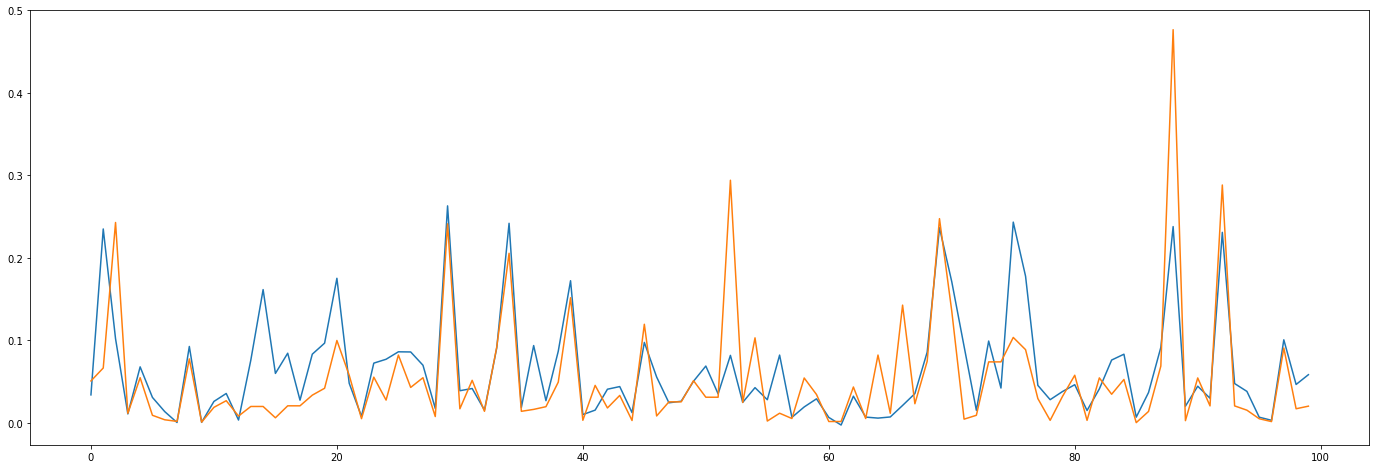

In [48]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (24, 8)
plt.plot(dataG['prediction'][:100], label = "Pred")  # Load the 500 data points from prediction with label name 'Pred'
plt.plot(dataG['violation_probability'][:100], label = "Actual")